# Importing Liberary

In [8]:
import pandas as pd
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [10]:
import pandas as pd
df = pd.read_csv(r"C:\Users\hp\Downloads\1111\Allot\wooden\cleaned_monthly_wooden_data.csv", parse_dates=['date'])
df = df.rename({'date': 'month','yhat': 'count'}, axis = 1)
df

month  quantity
0  2019-11-01     69342
1  2019-12-01    116044
2  2020-01-01    131149
3  2020-02-01    122010
4  2020-03-01    113593
5  2020-04-01    109791
6  2020-05-01     65443
7  2020-06-01    106328
8  2020-07-01     89661
9  2020-08-01    132232
10 2020-09-01    161498
11 2020-10-01    136698
12 2020-11-01    118348
13 2020-12-01    165051
14 2021-01-01    180156
15 2021-02-01    171017
16 2021-03-01    162600
17 2021-04-01    158797
18 2021-05-01    114449
19 2021-06-01    155335
20 2021-07-01    138668
21 2021-08-01    181238
22 2021-09-01    210505
23 2021-10-01    185704
24 2021-11-01    167355
25 2021-12-01    214057
26 2022-01-01    229162
27 2022-02-01    220023
28 2022-03-01    211606
29 2022-04-01    207804
30 2022-05-01    163456
31 2022-06-01    204342
32 2022-07-01    187674
33 2022-08-01    230245
34 2022-09-01    259512
35 2022-10-01    234711
36 2022-11-01    216362

In [11]:
df.columns=['ds','y']

In [12]:
df['ds'] = pd.to_datetime(df['ds'])

<AxesSubplot:xlabel='ds'>

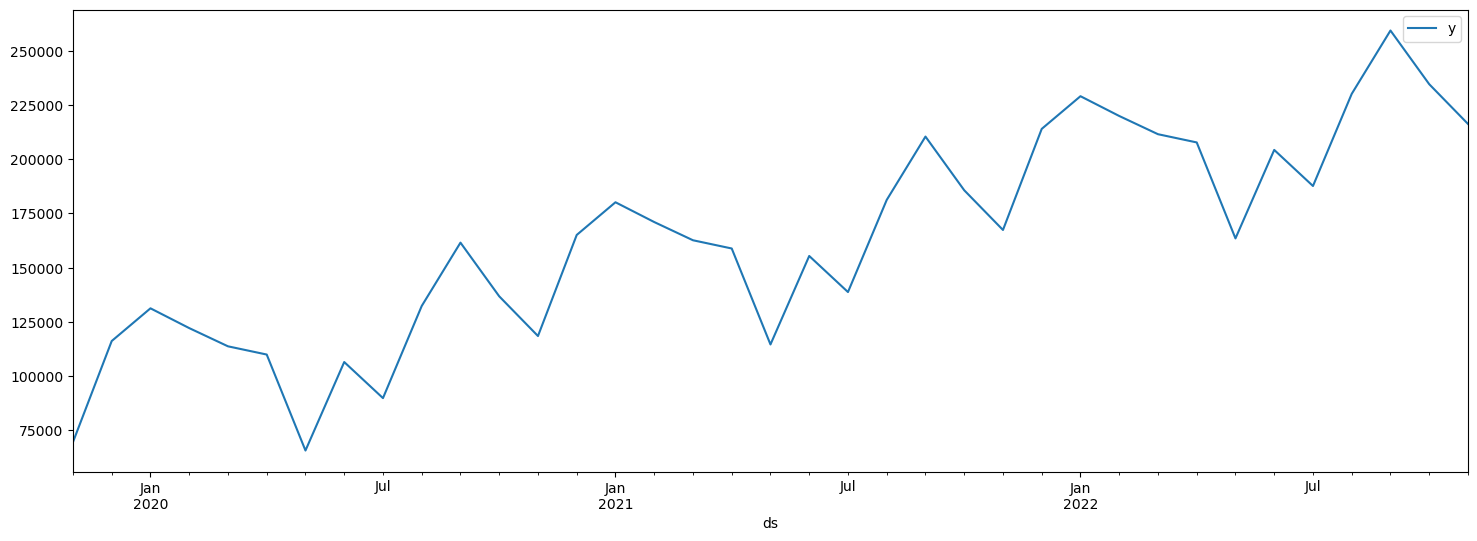

In [13]:
df.plot(x='ds',y='y',figsize=(18,6))

In [14]:
train=df[:24]
test=df[24:]

In [15]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

10:44:19 - cmdstanpy - INFO - Chain [1] start processing
10:44:19 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
forecast.tail()

ds          trend     yhat_lower     yhat_upper    trend_lower  \
384 2022-09-27  228045.151842  199525.464046  261236.618154  228045.147110   
385 2022-09-28  228172.692309  196185.256086  261859.748770  228172.687553   
386 2022-09-29  228300.232776  196104.510248  259443.935316  228300.227998   
387 2022-09-30  228427.773242  197248.523718  261238.916777  228427.768443   
388 2022-10-01  228555.313709  198821.860327  260360.415371  228555.308896   

       trend_upper  additive_terms  additive_terms_lower  \
384  228045.155984             0.0                   0.0   
385  228172.696470             0.0                   0.0   
386  228300.236957             0.0                   0.0   
387  228427.777437             0.0                   0.0   
388  228555.317928             0.0                   0.0   

     additive_terms_upper  multiplicative_terms  multiplicative_terms_lower  \
384                   0.0                   0.0                         0.0   
385                   0.0                   0.0                         0.0   
386                   0.0                   0.0                         0.0   
387                   0.0                   0.0                         0.0   
388                   0.0                   0.0                         0.0   

     multiplicative_terms_upper           yhat  
384                         0.0  228045.151842  
385                         0.0  228172.692309  
386                         0.0  228300.232776  
387                         0.0  228427.773242  
388                         0.0  228555.313709

In [17]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
384 2022-09-27  228045.151842  199525.464046  261236.618154
385 2022-09-28  228172.692309  196185.256086  261859.748770
386 2022-09-29  228300.232776  196104.510248  259443.935316
387 2022-09-30  228427.773242  197248.523718  261238.916777
388 2022-10-01  228555.313709  198821.860327  260360.415371

In [18]:
plot_plotly(m ,forecast)

In [19]:
plot_components_plotly(m,forecast)

In [20]:
from statsmodels.tools.eval_measures import rmse

In [21]:
predictions = forecast.iloc[-12:]['yhat']

In [81]:
#RMSE between actual and  predicted values
print("RMSE",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

RMSE 852.6220885534883
Mean Value of Test Dataset: 14885.166666666666
